In [130]:
#Import Mod
import pandas as pd
from datetime import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## Spray Dataset

In [2]:
spray = pd.read_csv('./dataset/spray.csv')
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [3]:
spray.dtypes

Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object

In [4]:
spray.shape

(14835, 4)

4 Features, 14835 rows (samples)

In [5]:
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [6]:
spray[spray.Time.isnull()]

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014
...,...,...,...,...
1609,2011-09-07,NaN,41.995876,-87.811615
1610,2011-09-07,NaN,41.995972,-87.810271
1611,2011-09-07,NaN,41.995684,-87.810319
1612,2011-09-07,NaN,41.994724,-87.810415


Dropping Time as it only indicate 2 hours window to spray and show low level of significant. 

In [7]:
spray.drop('Time', axis=1, inplace=True)

In [8]:
spray.shape

(14835, 3)

### Date datetime conversion

In [9]:
spray['Date'] = pd.to_datetime(spray['Date'])

In [10]:
spray.head()

,Date,Latitude,Longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858


In [11]:
spray.dtypes

Date         datetime64[ns]
Latitude            float64
Longitude           float64
dtype: object

In [12]:
spray.Date.dt.day.head(2)

0    29
1    29
Name: Date, dtype: int64

In [13]:
spray.Date.dt.month.head(2)

0    8
1    8
Name: Date, dtype: int64

In [14]:
print(spray.Date.max())
spray.Date.min()

2013-09-05 00:00:00


Timestamp('2011-08-29 00:00:00')

In [15]:
spray.duplicated().sum()

541

In [16]:
spray.drop_duplicates(inplace=True)

### Export

In [18]:
spray.to_csv('./clean_data/spray_clean.csv', index = False)

---

## Weather Dataset

In [19]:
weather = pd.read_csv('./dataset/weather.csv')

In [20]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [21]:
weather.Station.value_counts() #Balanced sample size from station 1 and 2

1    1472
2    1472
Name: Station, dtype: int64

In [22]:
weather.shape

(2944, 22)

### Cleaning Null

In [23]:
weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [24]:
weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [25]:
for col in weather.columns:
    if weather[col].dtype == 'object':
        print(weather[col].unique())

['2007-05-01' '2007-05-02' '2007-05-03' ... '2014-10-29' '2014-10-30'
 '2014-10-31']
['67' '68' '51' '52' '56' '58' 'M' '60' '59' '65' '70' '69' '71' '61' '55'
 '57' '73' '72' '53' '62' '63' '74' '75' '78' '76' '77' '66' '80' '64'
 '81' '82' '79' '85' '84' '83' '50' '49' '46' '48' '45' '54' '47' '44'
 '40' '41' '38' '39' '42' '37' '43' '86' '87' '89' '92' '88' '91' '93'
 '94' '90' '36']
['14' 'M' '-3' ' 2' ' 4' ' 5' '10' '12' '13' '-2' '15' '11' '-4' '-6' ' 8'
 '-5' ' 1' ' 9' ' 6' '-9' '-8' ' 3' ' 0' '-1' '-7' ' 7' '-14' '18' '16'
 '22' '21' '20' '-10' '-16' '17' '-12' '-11' '-15' '-17' '19' '-13' '23']
['56' '57' '47' '48' '50' '49' '46' '54' '53' '62' '63' '60' '61' '51'
 '59' '58' '43' '44' '45' '65' '66' '67' '64' '52' '55' '69' '68' '70'
 '72' '71' '73' '74' '76' '42' '39' '40' '41' '35' '33' '34' 'M' '75' '36'
 '32' '38' '78' '77' '37']
['0' '14' '13' '9' '7' 'M' '5' '6' '4' '10' '8' '12' '3' '2' '1' '15' '16'
 '19' '17' '20' '11' '18' '21' '25' '24' '27' '26' '23' '28' '22' '29'

No null values (but there are empty strings, -, T, or M for empty values)

In [26]:
def get_null(weather): 
    null_df = pd.DataFrame(columns=['col', 'M', '-', 'T', 'Blank'])
    i = 0
    for col in weather.columns:
        if weather[col].dtype == 'object':
            null_df.at[i, 'col'] = col
            null_df.at[i, 'M'] = weather[col].apply(lambda x: 1 if x == 'M' else 0).sum()
            null_df.at[i, '-'] = weather[col].apply(lambda x: 1 if x == '-' else 0).sum()
            null_df.at[i, 'T'] = weather[col].apply(lambda x: 1 if x == '  T' else 0).sum()
            null_df.at[i, 'Blank'] = weather[col].apply(lambda x: 1 if x == ' ' else 0).sum()
        i += 1
    return null_df

In [27]:
get_null(weather)

,col,M,-,T,Blank
1,Date,0,0,0,0
4,Tavg,11,0,0,0
5,Depart,1472,0,0,0
7,WetBulb,4,0,0,0
8,Heat,11,0,0,0
9,Cool,11,0,0,0
10,Sunrise,0,1472,0,0
11,Sunset,0,1472,0,0
12,CodeSum,0,0,0,1609
13,Depth,1472,0,0,0


1. M = Missing
2. '-' = Missing
3. T = Low value
4. Blank = Missing

In [28]:
station_one = weather[weather['Station'] == 1]
station_one.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0


In [29]:
get_null(station_one)

,col,M,-,T,Blank
1,Date,0,0,0,0
4,Tavg,0,0,0,0
5,Depart,0,0,0,0
7,WetBulb,3,0,0,0
8,Heat,0,0,0,0
9,Cool,0,0,0,0
10,Sunrise,0,0,0,0
11,Sunset,0,0,0,0
12,CodeSum,0,0,0,805
13,Depth,0,0,0,0


In [30]:
station_two = weather[weather['Station'] == 2]
station_two.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [31]:
get_null(station_two)

,col,M,-,T,Blank
1,Date,0,0,0,0
4,Tavg,11,0,0,0
5,Depart,1472,0,0,0
7,WetBulb,1,0,0,0
8,Heat,11,0,0,0
9,Cool,11,0,0,0
10,Sunrise,0,1472,0,0
11,Sunset,0,1472,0,0
12,CodeSum,0,0,0,804
13,Depth,1472,0,0,0


#### Sunrise/Sunset (Since the report is on the same day. Sunrise/Sunset time should be the same in both channel)
#### Same goes for Depart and SnowFall

In [32]:
weather['SnowFall'] = weather['SnowFall'].apply(lambda x: float(x) if x.isdigit() else 0.0)

In [33]:
i = 0
while i < weather.shape[0]:
    weather.loc[i+1, 'Sunrise'] = weather.loc[i, 'Sunrise']
    weather.loc[i+1, 'Sunset'] = weather.loc[i, 'Sunset']
    weather.loc[i+1, 'SnowFall'] = weather.loc[i, 'SnowFall']
    weather.loc[i+1, 'Depart'] = weather.loc[i, 'Depart']
    i+=2

In [34]:
weather['Depart'] = weather['Depart'].apply(lambda x: int(x))

In [35]:
weather

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,14,51,57,0,3,...,,M,M,0.0,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,-3,42,47,13,0,...,BR HZ,M,M,0.0,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45,-4,34,42,20,0,...,,M,M,0.0,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,...,,0,M,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,-4,35,42,20,0,...,RA,M,M,0.0,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,...,RA SN,0,M,0.0,0.03,29.49,30.20,22.6,34,22.9


In [36]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

#### Water1

In [37]:
weather = weather.drop(labels='Water1', axis=1)

#### Date

In [38]:
weather.Date = pd.to_datetime(weather.Date)

#### Tavg

In [39]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,1849,,0,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,14,51,57,0,3,...,1849,,M,0.0,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,1850,BR,0,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,-3,42,47,13,0,...,1850,BR HZ,M,0.0,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,1851,,0,0.0,0.00,29.39,30.12,11.7,7,11.9


Based on Tavg from .head() it is (Tmax+Tmin)/2 then rounded up to a whole number

In [40]:
weather['Tavg'] = ((weather['Tmax'] + weather['Tmin'])/2)
weather['Tavg'] = weather['Tavg'].apply(lambda x: math.ceil(x))

#### Stn Pressure

In [41]:
weather['StnPressure'] = weather['StnPressure'].apply(lambda x: float(x) if x.isdigit() else weather.StnPressure.mode())
weather['StnPressure'] = weather['StnPressure'].apply(lambda x: float(x))

#### Avg Speed

In [42]:
weather['AvgSpeed'] = weather['AvgSpeed'].apply(lambda x: float(x) if x != 'M' else np.nan)

In [43]:
weather.AvgSpeed.sort_values()

1785     1.7
2870     1.9
1737     2.0
2049     2.1
1008     2.1
        ... 
1462    23.2
1460    26.3
87       NaN
1745     NaN
2067     NaN
Name: AvgSpeed, Length: 2944, dtype: float64

In [44]:
weather.AvgSpeed.mode()

0    6.9
dtype: float64

In [45]:
weather.AvgSpeed.median()

8.1

In [46]:
round(weather.AvgSpeed.mean(), 1)

8.6

In [47]:
weather['AvgSpeed'].fillna(round(weather.AvgSpeed.mean(), 1), inplace=True)

#### Sea Level

In [48]:
weather['SeaLevel'] = weather['SeaLevel'].apply(lambda x: float(x) if x != 'M' else np.nan)

In [49]:
weather.SeaLevel.sort_values().tail(10)

361     30.53
87        NaN
832       NaN
994       NaN
1732      NaN
1745      NaN
1756      NaN
2067      NaN
2090      NaN
2743      NaN
Name: SeaLevel, dtype: float64

In [50]:
weather.SeaLevel.sort_values()

1461    29.23
1460    29.25
341     29.34
340     29.34
2180    29.43
        ...  
1745      NaN
1756      NaN
2067      NaN
2090      NaN
2743      NaN
Name: SeaLevel, Length: 2944, dtype: float64

In [51]:
weather.SeaLevel.mean()

29.968129471890993

In [52]:
weather.SeaLevel.median()

29.97

In [53]:
weather.SeaLevel.mode()

0    30.0
dtype: float64

In [54]:
weather['SeaLevel'].fillna(round(weather.SeaLevel.median()), inplace=True)

#### WetBulb

In [55]:
weather[weather['WetBulb']=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
848,1,2009-06-26,86,69,78,7,60,M,0,13,...,1931,,0,0.0,0.00,29.34,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,73,0,57,M,0,8,...,1900,,0,0.0,0.00,29.34,30.08,5.3,5,6.5
2412,1,2013-08-11,81,60,71,-2,61,M,0,6,...,1859,RA,0,0.0,0.01,29.34,30.07,2.0,27,3.0
2415,2,2013-08-12,85,69,77,2,63,M,0,12,...,1858,RA,M,0.0,0.66,29.34,29.92,4.5,26,7.7


In [56]:
weather['WetBulb'] = weather['WetBulb'].apply(lambda x: float(x) if x != 'M' else np.nan)

In [57]:
weather.WetBulb.median()

61.0

In [58]:
weather.WetBulb.mean()

59.3108843537415

In [59]:
weather.WetBulb.mode()

0    63.0
dtype: float64

In [60]:
weather['WetBulb'].fillna(round(weather.WetBulb.median()), inplace=True)

#### Depth
1. Can be dropped (only contain 0)

In [61]:
weather.drop('Depth', axis=1, inplace=True)

#### Heat/Cool (Where Heat is missing, cool misses as well)

In [62]:
weather[weather['Heat'] == 'M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,65,4,42,50.0,M,M,0444,1852,,0.0,0.00,29.34,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,66,5,68,71.0,M,M,0424,1929,TS RA,0.0,0.28,29.34,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,54,-4,41,47.0,M,M,0548,1734,,0.0,0.00,29.34,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,86,5,70,74.0,M,M,0435,1921,TS TSRA BR,0.0,0.14,29.34,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,78,-1,51,61.0,M,M,0506,1843,,0.0,0.00,29.34,30.00,4.7,19,8.6
2211,2,2013-05-02,71,42,57,-5,39,45.0,M,M,0447,1850,,0.0,0.00,29.34,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,72,-1,48,54.0,M,M,0541,1746,,0.0,0.00,29.34,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,69,1,48,54.0,M,M,0546,1737,RA BR,0.0,0.22,29.34,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,62,-1,44,50.0,M,M,0554,1725,RA DZ BR,0.0,0.06,29.34,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,64,-4,43,47.0,M,M,0447,1850,RA,0.0,0.04,29.34,29.79,10.7,23,11.9


In [63]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56.0,0,2,0448,1849,,0.0,0.00,29.34,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,14,51,57.0,0,3,0448,1849,,0.0,0.00,29.34,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47.0,14,0,0447,1850,BR,0.0,0.00,29.34,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,-3,42,47.0,13,0,0447,1850,BR HZ,0.0,0.00,29.34,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48.0,9,0,0446,1851,,0.0,0.00,29.34,30.12,11.7,7,11.9


Data is missing on station 2. However the heat/cool should be similar on station 1 and 2. Data from station will be used to replace the missing values

In [64]:
col = list(weather[weather['Heat'] == 'M'].index)
for i in col:
    weather.loc[i, 'Heat'] = weather.loc[i-1, 'Heat']
    weather.loc[i, 'Cool'] = weather.loc[i-1, 'Cool']

In [65]:
weather['Heat'] = weather['Heat'].apply(lambda x: int(x))
weather['Cool'] = weather['Cool'].apply(lambda x: int(x))

#### PrecipTotal

In [66]:
weather[weather['PrecipTotal']=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
117,2,2007-06-28,73,61,67,-5,56,61.0,0,2,0419,1931,,0.0,M,29.34,30.07,12.2,2,13.3
119,2,2007-06-29,71,56,64,-8,56,60.0,1,0,0419,1931,,0.0,M,29.34,30.11,7.4,2,8.2


In [67]:
weather.iloc[116:120]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
116,1,2007-06-28,74,58,66,-5,55,60.0,0,1,0419,1931,,0.0,0.00,29.34,30.09,11.9,3,12.5
117,2,2007-06-28,73,61,67,-5,56,61.0,0,2,0419,1931,,0.0,M,29.34,30.07,12.2,2,13.3
118,1,2007-06-29,70,56,63,-8,55,59.0,2,0,0419,1931,,0.0,0.00,29.34,30.13,7.6,2,8.3
119,2,2007-06-29,71,56,64,-8,56,60.0,1,0,0419,1931,,0.0,M,29.34,30.11,7.4,2,8.2


In [68]:
weather['PrecipTotal'] = weather['PrecipTotal'].apply(lambda x: float(x) if x.isdecimal() else 0.0)

## Last check on dtypes and Objects' null values

In [69]:
weather.dtypes

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                    int64
Depart                  int64
DewPoint                int64
WetBulb               float64
Heat                    int64
Cool                    int64
Sunrise                object
Sunset                 object
CodeSum                object
SnowFall              float64
PrecipTotal           float64
StnPressure           float64
SeaLevel              float64
ResultSpeed           float64
ResultDir               int64
AvgSpeed              float64
dtype: object

In [70]:
get_null(weather)

,col,M,-,T,Blank
10,Sunrise,0,0,0,0
11,Sunset,0,0,0,0
12,CodeSum,0,0,0,1609


#### DayLight

In [71]:
weather['Sunrise'] = weather['Sunrise'].apply(lambda x: int(x))
weather['Sunset'] = weather['Sunset'].apply(lambda x: int(x))

In [72]:
weather['Daylight'] = weather['Sunset'] - weather['Sunrise']

In [73]:
def to_min(x):
    hour = round(x / 100)
    remainder = x%100
    return (hour * 60) + remainder

In [74]:
weather['Daylight'] = weather['Daylight'].apply(lambda x: to_min(x))

### Export

In [75]:
weather.to_csv('./clean_data/weather_clean.csv', index = False)

---

## Train/Test Datasets

In [76]:
train = pd.read_csv('dataset/train.csv')
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [77]:
test = pd.read_csv('dataset/test.csv')
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [78]:
train.WnvPresent.value_counts(normalize=True)

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

In [79]:
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [80]:
test.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

In [81]:
train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [82]:
test.dtypes

Id                          int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object

In [83]:
test.drop('Id', axis=1, inplace=True)

In [84]:
train['Date'] = pd.to_datetime(train['Date'])

In [85]:
test['Date'] = pd.to_datetime(test['Date'])

In [86]:
train.shape

(10506, 12)

In [87]:
test.duplicated().sum()

1533

#### Station Col

In [88]:
train['Longitude'] = train['Longitude'].apply(lambda x: str(x))
train['Latitude'] = train['Latitude'].apply(lambda x: str(x))

test['Longitude'] = test['Longitude'].apply(lambda x: str(x))
test['Latitude'] = test['Latitude'].apply(lambda x: str(x))

train['Station'] = train['Latitude'] + ' ' + train['Longitude']
test['Station'] = test['Latitude'] + ' ' + test['Longitude']

In [89]:
train.Station[:3]

0     41.95469 -87.800991
1     41.95469 -87.800991
2    41.994991 -87.769279
Name: Station, dtype: object

In [90]:
def get_station(x):
    list_temp = x.split()
    lat = float(list_temp[0])
    long = float(list_temp[1])
    
    if ((lat-41.995)**2 + (long+87.933)**2) < ((lat-41.786)**2 + (long+87.752)**2):
        return 1
    else:
        return 2

In [91]:
train['Station'] = train['Station'].apply(lambda x: get_station(x))

In [92]:
test['Station'] = test['Station'].apply(lambda x: get_station(x))

In [93]:
train.Station.value_counts()

2    8245
1    2261
Name: Station, dtype: int64

### Export

In [94]:
train.to_csv('./clean_data/train_clean.csv', index = False)
test.to_csv('./clean_data/test_clean.csv', index = False)

---

1. Rid of dupes by adding total Mus count to one row.

In [95]:
train_clean = pd.read_csv('./clean_data/train_clean.csv')
test_clean = pd.read_csv('./clean_data/test_clean.csv')

In [96]:
train_clean.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1


In [97]:
test_clean.shape

(116293, 11)

In [98]:
# merge nummosquitos and wnvpresent for duplicated rows

# create train_2 (new copy)
# to compare train and train_2 and verify code
train_2 = train_clean.copy()

# duplicated rows have the same values for the columns below
cols = ['Date','Species','Trap','Address','Block', 'Street','Trap', 'AddressNumberAndStreet','Latitude','Longitude', 'Station' ]

for row_idx,row in train_2.iterrows():
    
    # skip 1st row
    if row_idx > 0:
        
        # reset counter for each row
        duplicate_count = 0        
        
        for col in cols:
            
            # compare cells in current and previous rows
            # increment counter if both cells have the same value 
            if train_2.at[row_idx,col] == train_2.at[row_idx-1,col]:
                duplicate_count += 1               
                
        # counter equal to number of selected column
        # current row['nummosquitos','wnvpresent'] = sum of current and previous rows
        if duplicate_count == len(cols):
            train_2.at[row_idx,'NumMosquitos'] = train_2.at[row_idx,'NumMosquitos'] + train_2.at[row_idx-1,'NumMosquitos']
            train_2.at[row_idx,'WnvPresent'] = train_2.at[row_idx,'WnvPresent'] + train_2.at[row_idx-1,'WnvPresent']

# remove duplicated rows (keep only last row)
train_2.drop_duplicates(subset=cols, keep='last',inplace=True)

In [99]:
train_2.shape

(8475, 13)

In [100]:
train_2.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1


In [101]:
train_2['WnvPresent'].value_counts()

0     8018
1      409
2       31
3        9
4        2
7        1
6        1
5        1
10       1
9        1
8        1
Name: WnvPresent, dtype: int64

In [102]:
# check total nummosquitos and wnvpresent

print(train['NumMosquitos'].sum())
print(train['WnvPresent'].sum())
print('')

print(train_2['NumMosquitos'].sum())
print(train_2['WnvPresent'].sum())
print('')

print(train_2['WnvPresent'].unique())

135039
551

135039
551

[ 0  1  2  3 10  7  6  4  9  8  5]


In [103]:
# Since WnvPresent: whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present
# Then, convert wnvpresent: total count to 0 or 1

for row_idx,row in train_2.iterrows():
    
    if row['WnvPresent'] > 1:
        #print(row_idx,row['wnvpresent'])
        train_2.at[row_idx,'WnvPresent'] = 1
        
print(train_2['WnvPresent'].sum())
print(train_2['WnvPresent'].unique())

457
[0 1]


In [104]:
# show dataframe info

print(train_2.shape)
print(test_clean.shape)
print('')

print(train_2.columns)
print('')

print(test_clean.columns)

(8475, 13)
(116293, 11)

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Station'],
      dtype='object')

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'Station'],
      dtype='object')


In [105]:
train_2.to_csv('./clean_data/train_clean_final.csv')

In [106]:
train_clean_final = pd.read_csv('./clean_data/train_clean_final.csv')

In [107]:
train_clean_final.shape

(8475, 14)

In [108]:
train_clean.shape

(10506, 13)

In [110]:
train_clean.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,1


In [115]:
train_clean.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
Station                     int64
dtype: object

In [116]:
train_clean.Date = pd.to_datetime(train_clean.Date)

In [117]:
weather.head(1)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight
0,1,2007-05-01,83,50,67,14,51,56.0,0,2,...,1849,,0.0,0.0,29.34,29.82,1.7,27,9.2,841


## EDA

In [133]:
train_combined = pd.merge(train_clean, weather, how = 'left',left_on=['Date','Station'], right_on = ['Date','Station'])
display(train_combined.head())
display(train_combined.tail())

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,1917,BR HZ,0.0,0.0,29.34,30.11,5.8,18,6.5,996
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,1917,BR HZ,0.0,0.0,29.34,30.11,5.8,18,6.5,996
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,1917,BR HZ,0.0,0.0,29.34,30.11,5.8,18,6.5,996
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,1917,BR HZ,0.0,0.0,29.34,30.11,5.8,18,6.5,996
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,1917,BR HZ,0.0,0.0,29.34,30.11,5.8,18,6.5,996


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,...,1742,,0.0,0.0,29.34,30.04,4.1,9,4.6,819
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,...,1742,,0.0,0.0,29.34,30.04,4.1,9,4.6,819
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,...,1742,,0.0,0.0,29.34,30.04,4.1,9,4.6,819
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,...,1742,BR,0.0,0.0,29.34,30.04,3.8,8,4.2,819
10505,2013-09-26,"4200 West 65th Street, Chicago, IL 60621, USA",CULEX PIPIENS/RESTUANS,42,W 65TH ST,T235,"4200 W 65TH ST, Chicago, IL",41.776428,-87.627096,8,...,1742,,0.0,0.0,29.34,30.04,4.1,9,4.6,819


In [120]:
spray.head(1)

,Date,Latitude,Longitude
0,2011-08-29,42.391623,-88.089163


In [121]:
spray['year'] = spray.Date.dt.year
spray['month'] = spray.Date.dt.month

train_combined['year'] = train_combined.Date.dt.year
train_combined['month'] = train_combined.Date.dt.month

train_clean['year'] = train_clean.Date.dt.year
train_clean['month'] = train_clean.Date.dt.month

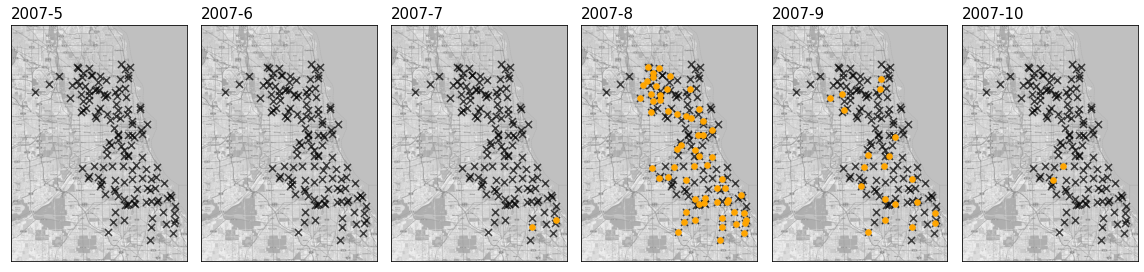

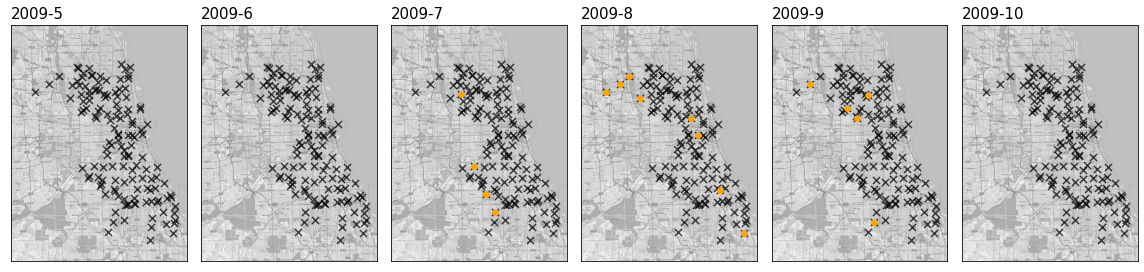

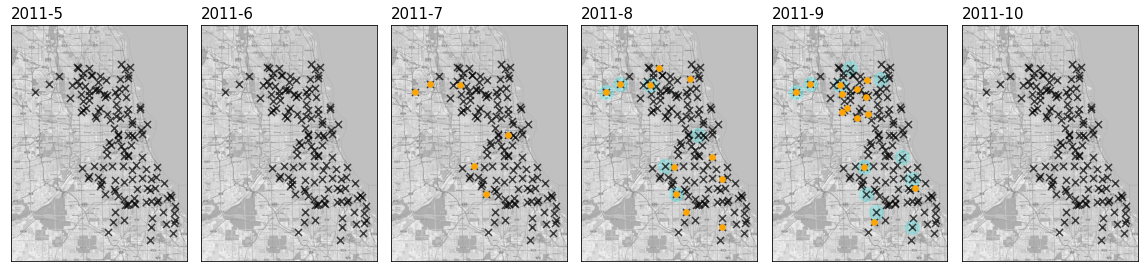

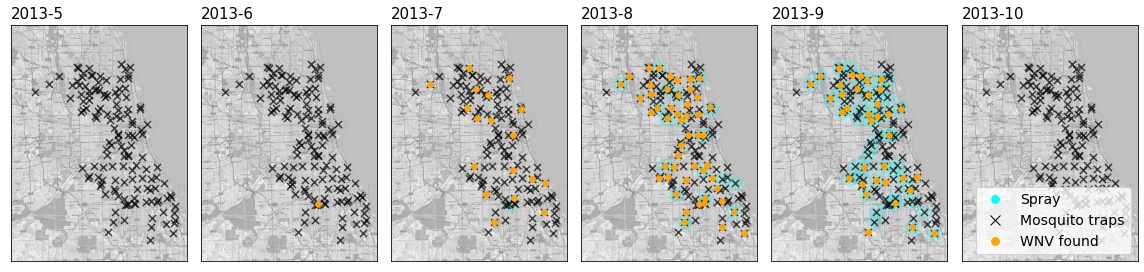

In [131]:
# set up basemap
mapdata = np.loadtxt("./dataset/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

# create plot for each month and year 
for year in train_clean.year.unique():
    fig, ax = plt.subplots(ncols = 6, figsize = (16,5))
    
    for i, month in enumerate([5,6,7,8,9,10]):
        # plot basemap
        ax[i].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
        
        # plot spray locations for year and month
        if year in spray.year.unique() and month in spray.month.unique():
            sprayed = spray[(spray.year == year) & (spray.month == month)][['Longitude', 'Latitude']].drop_duplicates().values
            ax[i].scatter(wnv[:,0], wnv[:,1], marker='o', c = 'cyan', s = 200, alpha = 0.2)
        
        # plot trap locations
        locations = train_clean[['Longitude', 'Latitude']].drop_duplicates().values
        ax[i].scatter(locations[:,0], locations[:,1], marker='x', c = 'black', s=50, alpha = 0.7)
        
        # plot wnv locations for year and month
        wnv = train_clean[(train_clean.year == year) & (train_clean.month == month) & (train_clean.WnvPresent == 1)]\
                [['Longitude', 'Latitude']].drop_duplicates().values
        ax[i].scatter(wnv[:,0], wnv[:,1], marker='o', c = 'orange', s = 30)
        
        # title and axes
        ax[i].set_title(f"{year}-{month}", fontsize = 15, ha = 'left', position = (0,1))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        
        plt.tight_layout()
#         plt.savefig(f'heatmap_{year}_{month}')

# custom legend
legend_elements=[Line2D([0],[0],marker='o', color='w',label='Spray', markerfacecolor='cyan', markersize=10),
                 Line2D([0],[0],marker='x', color='black', label='Mosquito traps',linestyle='', markersize=10),
                 Line2D([0],[0],marker='o', color='w',label='WNV found',markerfacecolor='orange', markersize=10)]

plt.legend(handles=legend_elements, loc='lower right', fontsize=14)
plt.tight_layout()

As from above, West Nile Virus start to increase from July and peak in the August where the temperature is around 68 to 75 degrees Fahrenheit.